In [1]:
import pandas as pd
from collections import Counter, defaultdict
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('cleaned_makeup.csv')

In [ ]:
descrip = data.cleaned_desc

In [ ]:
allwords = []
for d in descrip:
    try:
        words = d.split()
        allwords.extend(words)
    except:
        pass


In [ ]:
#allwords = ' '.join(allwords)
word_count = Counter(allwords)

In [ ]:
data_dict = dict(word_count)

# Generate the word cloud
wordcloud = WordCloud(width=1000, height=800, max_words=100).generate_from_frequencies(data_dict)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.savefig('wordcloud.png', bbox_inches='tight', pad_inches=0)
plt.show()


In [9]:
allwords_type = defaultdict(list)
for d in data.iterrows():
    try:
        words = d[1]['cleaned_desc'].split()
        allwords_type[d[1]['product_type']].extend(words)
    except:
        pass

In [ ]:
for k,v in allwords_type.items():
    c = Counter(v)
    wordcloud = WordCloud(width=1000, height=800, max_words=100).generate_from_frequencies(c)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Hide the axes
    plt.savefig(f'{k}_wordcloud.png', bbox_inches='tight', pad_inches=0)


In [10]:
L = len(allwords_type)
L

10

In [11]:
keys = []
for k,v in allwords_type.items():
    c = Counter(v)
    c = dict(sorted(c.items(), key=lambda item: item[1],reverse=True))
    keys.extend(list(c.keys())[:100])
    


In [12]:
keysc = Counter(keys)

In [13]:
keysc = dict(sorted(keysc.items(), key=lambda item: item[1], reverse=True))

In [27]:
stop_words = []
for k,v in keysc.items():
    if v > 9:
        stop_words.append(k)


In [3]:
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

In [4]:
label_encoder = LabelEncoder()
data['product_type'] = label_encoder.fit_transform(data['product_type'])


In [5]:
data = data.dropna(subset=['cleaned_desc'])
X = data['cleaned_desc']
y = data['product_type']

In [6]:
data = data.dropna(subset=['cleaned_desc'])
X = data['cleaned_desc']
y = data['product_type']

tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(X)

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the SVM classifier
svm = SVC(kernel='linear')

# Training the SVM model
svm.fit(X_train, y_train)

# Predicting the test set results
y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9230769230769231


In [25]:
data = data.dropna(subset=['cleaned_desc'])
X = data['cleaned_desc']
y = data['product_type']

tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(X)

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm = SVC(kernel='sigmoid', gamma='scale')
svm.fit(X_train, y_train)

# Predicting the test set results
y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9175824175824175


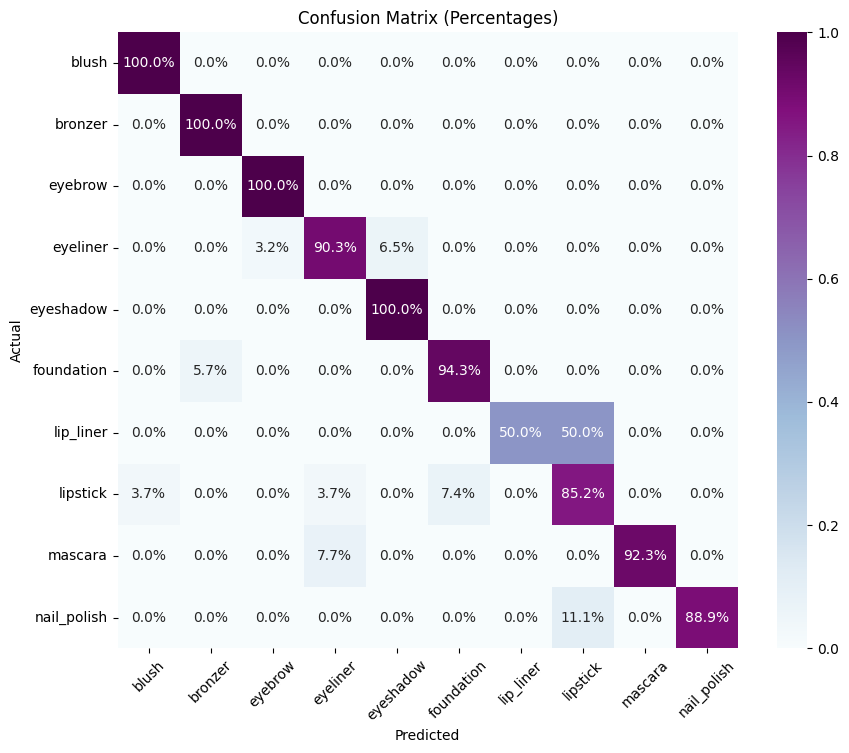

In [22]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Getting the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate percentages
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] 

# Plotting the confusion matrix with percentages
plt.figure(figsize=(10, 8))
heatmap= sns.heatmap(conf_matrix_percent, annot=True, fmt='.1%', cmap='BuPu', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Percentages)')
plt.show()

In [28]:
data = data.dropna(subset=['cleaned_desc'])
X = data['cleaned_desc']
y = data['product_type']
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words)
X = tfidf_vectorizer.fit_transform(X)

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the SVM classifier
svm = SVC(kernel='linear')

# Training the SVM model
svm.fit(X_train, y_train)

# Predicting the test set results
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9120879120879121


Random Forest Classifier Accuracy: 0.8791208791208791


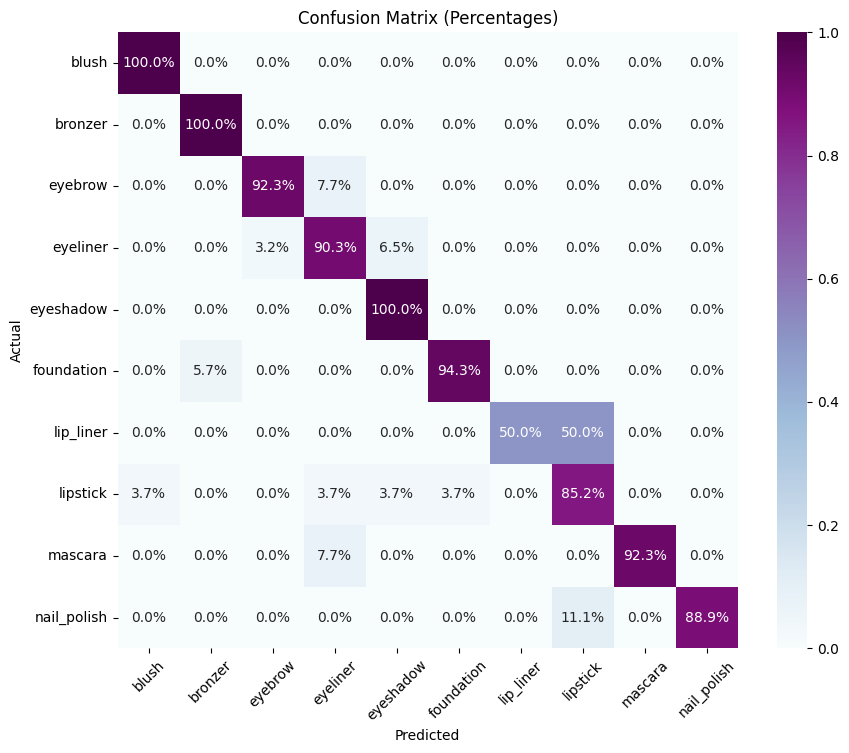

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
data = data.dropna(subset=['cleaned_desc'])
X = data['cleaned_desc']
y = data['product_type']
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(X)
# Assuming data, X, y, and tfidf_vectorizer are already defined as per your code

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the Random Forest model
rf_classifier.fit(X_train, y_train)

# Predicting the test set results
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Classifier Accuracy: {accuracy_rf}")

conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate percentages
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] 

# Plotting the confusion matrix with percentages
plt.figure(figsize=(10, 8))
heatmap= sns.heatmap(conf_matrix_percent, annot=True, fmt='.1%', cmap='BuPu', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Percentages)')
plt.show()

In [29]:
# Using pre-trained Word2Vec embeddings (example with Gensim library)
from gensim.models import KeyedVectors
import gensim.downloader as api
import numpy as np

# Download the Word2Vec model
word2vec_model = api.load('word2vec-google-news-300')
X = data['cleaned_desc']
y = data['product_type']

# Load pre-trained Word2Vec embeddings

# Convert text data to vectors using Word2Vec embeddings
X_word2vec = [np.mean([word2vec_model[word] for word in sentence.split() if word in word2vec_model] or [np.zeros(300)], axis=0) for sentence in X]
X_word2vec = np.vstack(X_word2vec)
# Proceed with splitting, model training, and evaluation as before


KeyboardInterrupt: 

In [45]:
X_word2vec.shape

(906, 300)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_word2vec, y, test_size=0.2, random_state=42)

# Initializing the SVM classifier
svm = SVC(kernel='linear')

# Training the SVM model
svm.fit(X_train, y_train)

# Predicting the test set results
y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7802197802197802
